importing dependencies

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
pip install scikit-learn

Loading the datasets


In [8]:
# loading the csv data
df=pd.read_csv('/content/IRIS.csv')

In [9]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
#display basics stats of data
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [14]:
#display the number of sample of each class
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Preprocessing data

In [15]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Data Analysis

<Axes: >

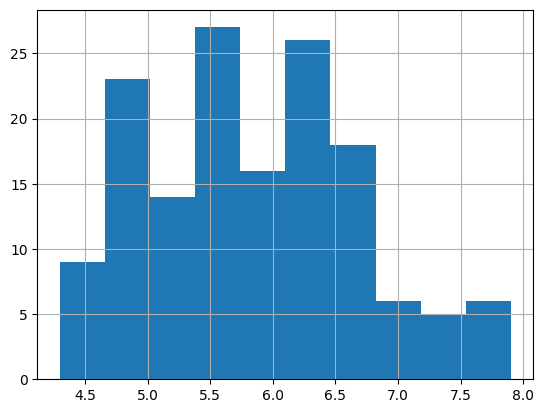

In [16]:
df['sepal_length'].hist()

<Axes: >

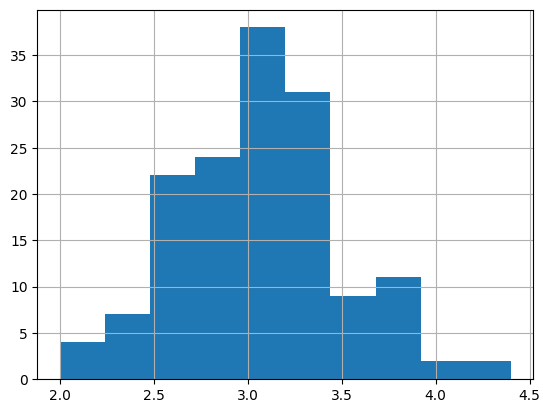

In [17]:
df['sepal_width'].hist()

<Axes: >

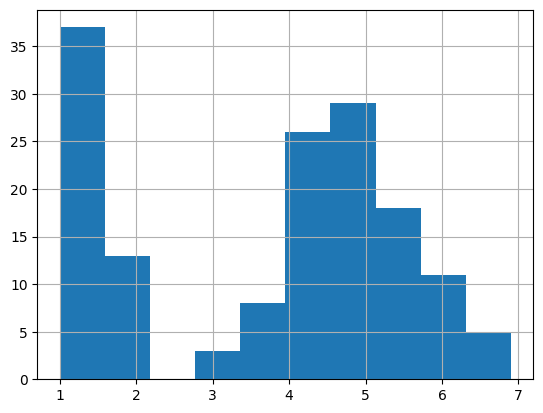

In [18]:
df['petal_length'].hist()

<Axes: >

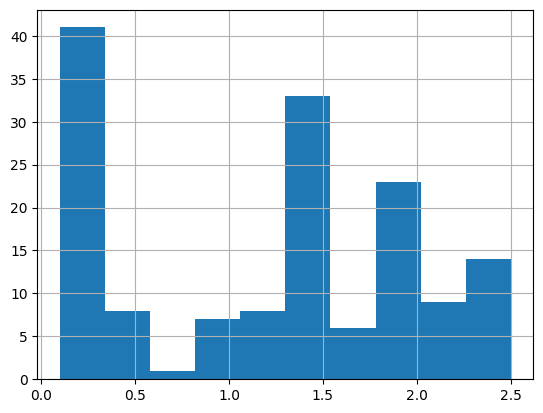

In [19]:
df['petal_width'].hist()

create list of colours and class labels


In [31]:
colours=['red','orange','blue']
species=['viginicia','versicolor','setosa']

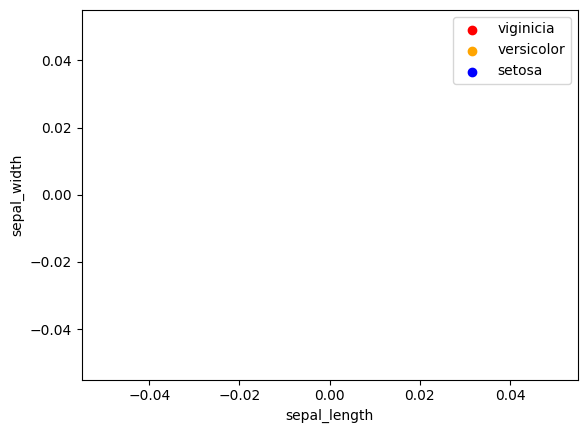

In [32]:
for i in range(3):
  #filter data on each class
  x=df[df['species'] == species[i]]
  #plot the scatter plot
  plt.scatter(x['sepal_length'],x['sepal_width'],c=colours[i],label=species[i])
  plt.xlabel("sepal_length")
  plt.ylabel("sepal_width")
  plt.legend()


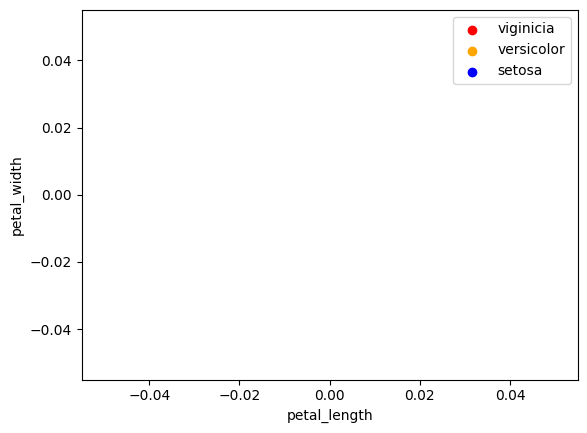

In [33]:
for i in range(3):
  #filter data on each class
  x=df[df['species'] == species[i]]
  #plot the scatter plot
  plt.scatter(x['petal_length'],x['petal_width'],c=colours[i],label=species[i])
  plt.xlabel('petal_length')
  plt.ylabel('petal_width')
  plt.legend()


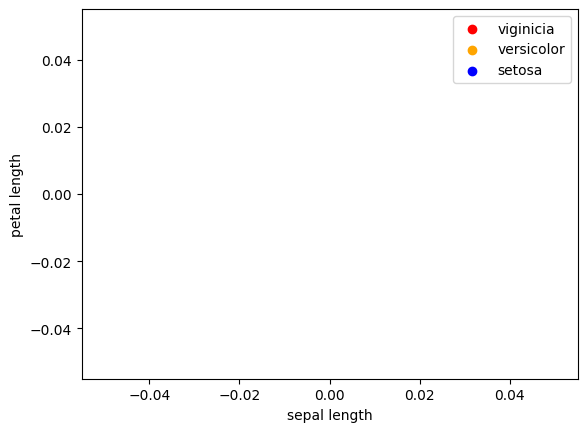

In [34]:
for i in range(3):
  #filter data on each class
  x=df[df['species'] == species[i]]
  #plot the scatter plot, use 'sepal_length' instead of 'sepal.length'
  plt.scatter(x['sepal_length'],x['petal_length'],c=colours[i],label=species[i])
  plt.xlabel('sepal length')
  plt.ylabel('petal length')
  plt.legend()

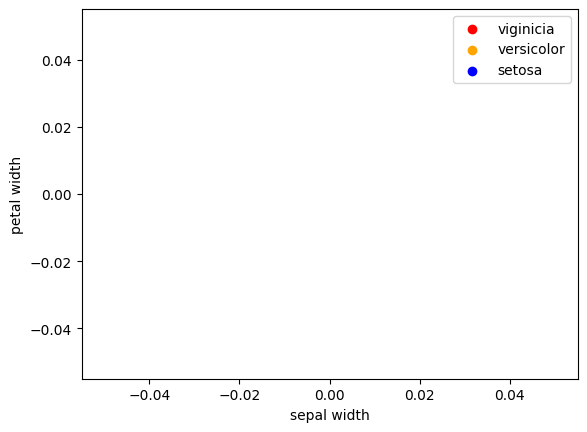

In [35]:
for i in range(3):
  #filter data on each class
  x=df[df['species'] == species[i]]
  #plot the scatter plot, use 'sepal_length' instead of 'sepal.length'
  plt.scatter(x['sepal_width'],x['petal_width'],c=colours[i],label=species[i])
  plt.xlabel('sepal width')
  plt.ylabel('petal width')
  plt.legend()

correlation matrics


In [38]:


# Calculate the correlation matrix on numerical columns only
df.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

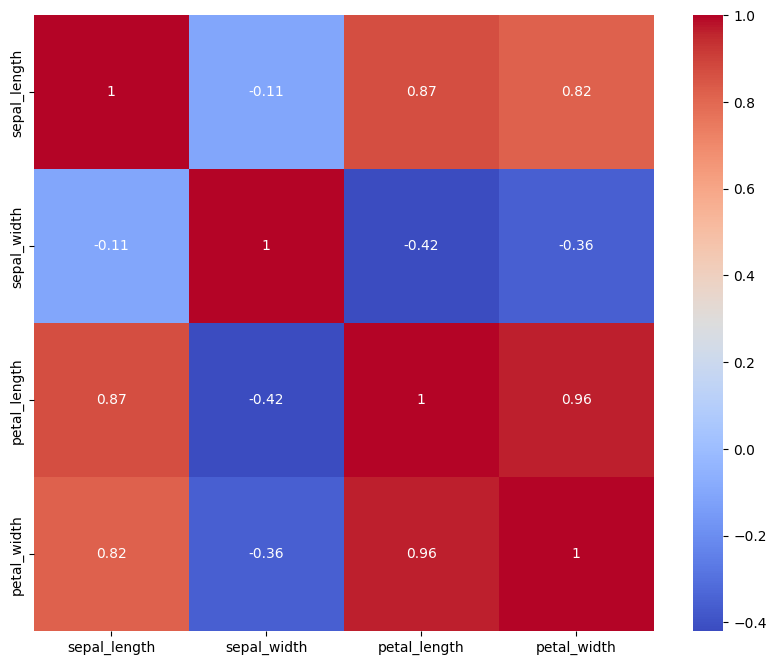

In [43]:
corr = df.corr(numeric_only=True)
# plot the heat map
fig, ax =plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=True, ax=ax, cmap="coolwarm")

In [44]:
#from sklearn.preprocessing import LabelEncoder
# Le=LabelEncoder()
#transform the string Label to integars
#df['species']le.fit_transform(df['species'])
df.head()




,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Model training and testing

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

#input data
x=df.drop(columns=['species'])
#output data
y=df['species']
#split data for train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)



In [49]:
#logistic Regression
model=LogisticRegression()
model.fit(x_train,y_train)
print("logistic regression accuracy:",model.score(x_test,y_test)*100)

logistic regression accuracy: 95.55555555555556


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [50]:
#model training
model.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
#print matric to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 95.55555555555556


In [52]:
# k-nearest neighbors
model = KNeighborsClassifier()
model.fit(x_train.values, y_train.values)
print("K-nearest neighbors accuracy:",model.score(x_test,y_test)*100)

K-nearest neighbors accuracy: 95.55555555555556


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [54]:
model.fit(x_train.values, y_train.values)

KNeighborsClassifier()

In [55]:
#print matrices to get performance
print("Accuracy:", model.score(x_test,y_test)*100)

Accuracy: 95.55555555555556


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [56]:
#Decision Tree
model = DecisionTreeClassifier()
model.fit(x_train.values,y_train.values)
print("Decision Tree Accuracy:", model.score(x_test,y_test)*100)

Decision Tree Accuracy: 95.55555555555556


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [57]:
model.fit(x_train.values,y_train.values)

DecisionTreeClassifier()

In [58]:
#print metrics to get performance
print("Accuracy:",model.score(x_test,y_test)*100)

Accuracy: 95.55555555555556


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [59]:
#save the model
import pickle
filename="saved_model.sav"
pickle.dump(model,open(filename,'wb'))

In [60]:
import pickle

In [72]:
#save the update model
filename = 'saved_model.sav'
try:
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
        print("Model saved sucessfully.")
except Exception as e:
    print("Error saving the model:", e)

Model saved sucessfully.


Model saved sucessfully

In [67]:
load_model = pickle.load(open(filename,'rb'))

In [70]:
result = load_model.predict([[6, 0, 2.2, 4.0]])
print(result)

['Iris-setosa']


In [71]:
import sklearn
print(sklearn.__version__)

1.2.2
